## Actividad 7

In [1]:
import merger_tree_tools as mtt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.table import Table
from astropy.cosmology import Planck15 as cosmo
import h5py
import pandas as pd

In [2]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 7/' 
# path_win =

In [3]:
data = {'GalaxyID_test':[],'GroupID_test':[],'snap_lm':[],'z_lm':[],'L_lm':[],'snap_lmm':[],'z_lmm':[],'L_lmm':[]}
DATA_merge = pd.DataFrame(data=data)

In [4]:
table  = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')

In [5]:
table_a = table[(table['Stars_Mass']>=1e10)].copy()
table_a

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,10.139413,30,1.307842e+11,0.000000,1411.312012,3.002119e+14
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.727174,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.696796,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.714222,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,8.520104,30,3.944613e+10,0.000000,1411.312012,3.002119e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.740806,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.741599,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.743705,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.737761,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11


data = {'GalaxyID_test':[],'GroupID_test':[],'snap_lm':[],'z_lm':[],'L_lm':[],'snap_lmm':[],'z_lmm':[],'L_lmm':[]}#Defino las columnas de output
DATA = pd.DataFrame(data=data)

Id de algunas galaxias que que en algún snap tiene level of merger igual a cero
* snap  3: 15782708
* sanp  8: 10324277, 10326234, 10480764
* snap 12: 10329240, 10517554, 8151798
* snap 19: 12757860 
* snap 23: 5299569, 10750093
* snap 27: 8279115, 8310690

In [60]:
# Simulación a usar y datos de galaxia deseada
simu='RefL0100N1504'
snap=28

In [61]:
galid = 12757860        

In [62]:
# Usuario y contraseña para conectarse a EAGLE DataBase
usr='cht015'
pwd='BH457tfj'

# Descargar todos los IDS necesarios de la galaxia deseada

myIDs=mtt.retrieve_ids(usr,pwd,simu,snap,galid)

# Descargar merger tree completo de la galaxia deseada
# Nombre y alias de la tabla de la cual se quieren descargar datos
table='SubHalo'
table_alias='sub'

# Variables que se quiere descargar. OJO!! Asegurarse que estas variables
# estén en la tabla deseada.
columns=[
         'GalaxyID','LastProgID','TopLeafID','DescendantID',
         'SnapNum','Redshift','Stars_Mass','SF_Mass','GroupID'
        ]

raw_tree=mtt.download_merger_tree(usr,pwd,simu,myIDs['GalaxyID'],myIDs['LastProgID'],
                                  table=table,table_alias=table_alias,columns=columns)

# NOTA: si ya se tiene descargados en un archivo todas las galaxias de la simu, se puede
#       saltear esta celda, y en su lugar, leer dicho archivo de datos y usar máscaras
#       para seleccionar las galaxias del árbol deseado

In [63]:
# Aplicar condiciones a las galaxias del árbol, si es necesario
mask=(np.logical_or(raw_tree['Stars_Mass']>0e6,raw_tree['SF_Mass']>0)) 

In [64]:
# Armar arbol sólo con galaxias seleccionadas según condiciones anteriores
tree={}
for key in raw_tree.keys():
    tree[key]=raw_tree[key][mask]
        
# Ordeno las galaxias según SnapNum creciente
mask_order=(tree['SnapNum']).argsort()
for key in tree.keys():
    tree[key]=tree[key][mask_order]

## Revisar

In [65]:
# Armo un diccionario con solo la main branch del árbol
main_branch={}
# Select galaxies in the main branch 
mask_main=np.logical_and(tree['GalaxyID']>=myIDs['GalaxyID'],
                         tree['GalaxyID']<=myIDs['TopLeafID']) 

for key in tree.keys():
    main_branch[key]=tree[key][mask_main]

In [66]:
xplot_main=main_branch['SnapNum']
xlabel='SnapNum'

# Calculo level of merger
level_merger=[1]       # Inicializo con un 1, porque la primer galaxia del main branch 
                      # no viene de ninguna fusión...


for k in range(np.size(xplot_main)-1):
    m1=main_branch['Stars_Mass'][k]+main_branch['SF_Mass'][k]
    mask=(tree['DescendantID']==main_branch['GalaxyID'][k+1]) & (tree['SnapNum']!=28)
    # La condición de snapnum distinto a 28 es porque galaxias a z=0 no tienen descendiente,
    # y se les asigna como DescendantID su propio GalaxyID
    m2=np.sum(tree['Stars_Mass'][mask])+np.sum(tree['SF_Mass'][mask])
    level=m2/m1
    level_merger=np.append(level_merger,level)


In [67]:
# Variable a graficar en eje y
yplot_main=level_merger
#yplot_main=np.log10(main_branch['Stars_Mass'])
#yplot_main=np.log10(main_branch['StarFormationRate'])

ylabel=r'$L_{\rm{merger}}$'
#ylabel=r'$\log(M_\bigstar)~[\rm{M}_\odot]$'
#ylabel=r'$\log(SFR)~[\rm{M}_\odot~\rm{yr}^{-1}]$'


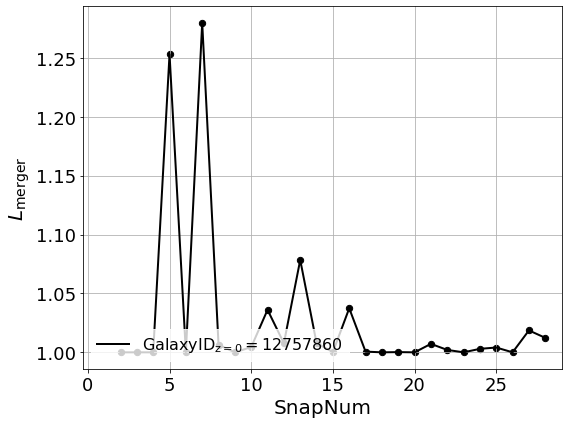

In [68]:
# Graficar level of merger vs. redshift

fig2,ax2=plt.subplots(figsize=(8,6))
#ax2.set_xlim(4.1,-0.1)
ax2.plot(xplot_main,yplot_main,c='k',lw=2,
         label=r'$\rm{GalaxyID}_{z=0}=$'+str(galid))
ax2.scatter(xplot_main,yplot_main,color='k',s=40)

ax2.set_xlabel(xlabel,fontsize=20)
ax2.set_ylabel(ylabel,fontsize=20)

ax2.tick_params(which='major',axis='both',labelsize=18)
ax2.grid()
ax2.legend(loc='lower left',fontsize=16,edgecolor='w')

xmin, xmax = -0.3,29
ax2.set_xlim(xmin,xmax)

ymin,ymax=0.95,1.65
#ax2.set_ylim(ymin,ymax)

# Adjust subplots
plt.tight_layout()

# plt.savefig('level_of_merger.png')

# Cosas para merger history 

In [17]:
i=0 

if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==1)):
    Lm_1 = level_merger[i]
    i=i+1
else: Lm_1 = np.nan
    
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==2)):
    Lm_2 = level_merger[i]
    i=i+1
else: Lm_2 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==3)):
    Lm_3 = level_merger[i]
    i=i+1
else: Lm_3 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==4)):
    Lm_4 = level_merger[i]
    i=i+1
else: Lm_4 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==5)):
    Lm_5 = level_merger[i]
    i=i+1
else: Lm_5 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==6)):
    Lm_6 = level_merger[i]
    i=i+1
else: Lm_6 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==7)):
    Lm_7 = level_merger[i]
    i=i+1
else: Lm_7 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==8)):
    Lm_8 = level_merger[i]
    i=i+1
else: Lm_8 = np.nan
    
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==9)):
    Lm_9 = level_merger[i]
    i=i+1
else: Lm_9 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==10)):
    Lm_10 = level_merger[i]
    i=i+1
else: Lm_10 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==11)):
    Lm_11 = level_merger[i]
    i=i+1
else: Lm_11 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==12)):
    Lm_12 = level_merger[i]
    i=i+1
else: Lm_12 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==13)):
    Lm_13 = level_merger[i]
    i=i+1
else: Lm_13 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==14)):
    Lm_14 = level_merger[i]
    i=i+1
else: Lm_14 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==15)):
    Lm_15 = level_merger[i]
    i=i+1
else: Lm_15 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==16)):
    Lm_16 = level_merger[i]
    i=i+1
else: Lm_16 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==17)):
    Lm_17 = level_merger[i]
    i=i+1
else: Lm_17 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==18)):
    Lm_18 = level_merger[i]
    i=i+1
else: Lm_18 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==19)):
    Lm_19 = level_merger[i]
    i=i+1
else: Lm_19 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==20)):
    Lm_20 = level_merger[i]
    i=i+1
else: Lm_20 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==21)):
    Lm_21 = level_merger[i]
    i=i+1
else: Lm_21 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==22)):
    Lm_22 = level_merger[i]
    i=i+1
else: Lm_22 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==23)):
    Lm_23 = level_merger[i]
    i=i+1
else: Lm_23 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==24)):
    Lm_24 = level_merger[i]
    i=i+1
else: Lm_24 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==25)):
    Lm_25 = level_merger[i]
    i=i+1
else: Lm_25 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==26)):
    Lm_26 = level_merger[i]
    i=i+1
else: Lm_26 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==27)):
    Lm_27 = level_merger[i]
    i=i+1
else: Lm_27 = np.nan
        
if ((i<=len(main_branch['SnapNum'])-1)and(main_branch['SnapNum'][i]==28)):
    Lm_28 = level_merger[i]
    i=i+1
else: Lm_28 = np.nan
    

# Cosas para Actividad 7 V2 

In [20]:
i=1
if level_merger[-i]>1:
    snap_lm = main_branch['SnapNum'][-1]
    z_lm    = main_branch['Redshift'][-1]
    L_lm    = level_merger[-1]
else:
    while level_merger[-i]<=1:
        if i<len(level_merger):
            i+=1
            snap_lm = main_branch['SnapNum'][-i]
            z_lm    = main_branch['Redshift'][-i]
            L_lm    = level_merger[-i]
            
        else:
            snap_lm = np.nan
            z_lm    = np.nan
            L_lm    = np.nan
            break

print('snap_lm:',snap_lm)
print('z_lm:',z_lm)
print('L_lm:',L_lm)

snap_lm: 25
z_lm: 0.27090108
L_lm: 1.008287787437439


In [21]:
j=1
if level_merger[-j]>1.3:
    snap_lm = main_branch['SnapNum'][-1]
    z_lm    = main_branch['Redshift'][-1]
    L_lm    = level_merger[-1]
else:
    while level_merger[-j]<=1.3:
        if j<len(level_merger):
            j+=1
            snap_lmm= main_branch['SnapNum'][-j]
            z_lmm   = main_branch['Redshift'][-j]
            L_lmm   = level_merger[-j]
        else:
            snap_lmm= np.nan
            z_lmm   = np.nan
            L_lmm   = np.nan
            break
        

print('snap_lmm:',snap_lmm)
print('z_lmm:',z_lmm)
print('L_lmm:',L_lmm)

snap_lmm: 5
z_lmm: 7.0495663
L_lmm: 3.6146204471588135


In [22]:
r=1
if level_merger[-r]>=1.15:
    snap_lm = main_branch['SnapNum'][-1]
    z_lm    = main_branch['Redshift'][-1]
    L_lm    = level_merger[-1]
else:
    while level_merger[-r]<=1.15:
        if r<len(level_merger):
            r+=1
            snap_lmm= main_branch['SnapNum'][-r]
            z_lmm   = main_branch['Redshift'][-r]
            L_lmm   = level_merger[-j]
        else:
            snap_lmm= np.nan
            z_lmm   = np.nan
            L_lmm   = np.nan
            break
        

print('snap_lmm:',snap_lmm)
print('z_lmm:',z_lmm)
print('L_lmm:',L_lmm)

snap_lmm: 6
z_lmm: 5.9711623
L_lmm: 3.6146204471588135


In [48]:
data = {'GalaxyID_test':table_a['GalaxyID'][p],'GroupID_test':table_a['GroupID'][p],
         'snap_lm':snap_lm,'z_lm':z_lm,'L_lm':L_lm,'snap_lmm':snap_lmm,'z_lmm':z_lmm,'L_lmm':L_lmm}

DATA_merge = DATA_merge.append(data,ignore_index=True).astype({'GalaxyID_test':int,'GroupID_test':int,
                                                               'snap_lm':int,'z_lm':float,'L_lm':float,
                                                               'snap_lmm':int,'z_lmm':float,'L_lmm':float})

NameError: name 'p' is not defined

In [42]:
DATA_merge

,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm
0,9498012,28000000000002,22,0.61519,1.369978,22,0.615190,1.369978
1,9498012,28000000000002,22,0.61519,1.369978,22,0.615190,1.369978
2,9508202,28000000000002,26,0.18271,1.000422,19,1.004122,1.325826


In [28]:
MERGE  = pd.read_csv(path_lin+'Actividad_7(data_level_merge).dat')
MERGE

,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm
0,9498012,28000000000002,22.0,0.615190,1.369978,22.0,0.615190,1.369978
1,9508202,28000000000002,26.0,0.182710,1.000422,19.0,1.004122,1.325826
2,9512113,28000000000002,26.0,0.182710,1.000422,24.0,0.365669,1.545269
3,9517736,28000000000002,26.0,0.182710,1.000422,NaN,NaN,NaN
4,9519365,28000000000002,25.0,0.270901,1.008288,5.0,7.049566,3.614620
...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,22.0,0.615190,1.009522,11.0,3.527977,1.465920
3634,10859653,28000000002570,22.0,0.615190,1.009522,12.0,3.016505,1.357690
3635,11104654,28000000002905,25.0,0.270901,1.007583,NaN,NaN,NaN
3636,11247394,28000000003127,25.0,0.270901,1.007583,NaN,NaN,NaN


In [2]:
i=0
long = 1000000
for i in np.arange(long):
    i+=1
    print(i/long,end='\r')